# Библиотеки

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import (
    roc_auc_score, average_precision_score, precision_score, recall_score, f1_score,
    precision_recall_curve, roc_curve, confusion_matrix, make_scorer
)

# Решение задач

In [2]:
# файл транзакций
df = pd.read_parquet('transaction_fraud_data.parquet')

# курс валют
currency_df = pd.read_parquet('historical_currency_exchange.parquet')

## Задача 61. Свободное исследование данных (вне тайминга)

### Задание: провести разведочный анализ данных, придумать продуктовые и технические гипотезы — какую ценность можете извлечь из данных для организации, которая предоставила данные.

Пользуйтесь любым удобным инструментарием при решении задачи и опишите в README как решали задачу, чем пользовались при решении и как принимали решения.

In [60]:
currency_df

,date,AUD,BRL,CAD,EUR,GBP,JPY,MXN,NGN,RUB,SGD,USD
0,2024-09-30,1.443654,5.434649,1.351196,0.895591,0.747153,142.573268,19.694724,1668.736400,94.133735,1.280156,1
1,2024-10-01,1.442917,5.444170,1.352168,0.897557,0.746956,143.831429,19.667561,1670.694524,92.898519,1.284352,1
2,2024-10-02,1.449505,5.425444,1.348063,0.903056,0.752241,143.806861,19.606748,1669.653006,94.583198,1.286983,1
3,2024-10-03,1.456279,5.442044,1.351451,0.906018,0.754584,146.916773,19.457701,1670.097873,95.655442,1.294391,1
4,2024-10-04,1.460930,5.477788,1.355260,0.906452,0.761891,146.592323,19.363467,1649.763738,94.755337,1.296800,1
5,2024-10-05,1.471447,5.457431,1.358726,0.910593,0.761939,148.796290,19.286645,1619.465727,94.934698,1.303670,1
6,2024-10-06,1.469948,5.463070,1.357479,0.910655,0.762157,148.725322,19.284784,1626.760323,94.993467,1.304541,1
7,2024-10-07,1.469358,5.455679,1.357600,0.911148,0.761611,148.509087,19.263497,1658.088878,95.582401,1.303118,1
8,2024-10-08,1.479802,5.495973,1.361858,0.910451,0.763520,147.888136,19.297377,1626.621519,96.167634,1.302788,1
9,2024-10-09,1.484282,5.535464,1.365741,0.911611,0.763666,148.274271,19.357738,1620.528912,96.750546,1.304275,1


In [61]:
df

,transaction_id,customer_id,card_number,timestamp,vendor_category,vendor_type,vendor,amount,currency,country,...,is_card_present,device,channel,device_fingerprint,ip_address,is_outside_home_country,is_high_risk_vendor,is_weekend,last_hour_activity,is_fraud
0,TX_a0ad2a2a,CUST_72886,6646734767813109,2024-09-30 00:00:01.034820,Restaurant,fast_food,Taco Bell,294.87,GBP,UK,...,False,iOS App,mobile,e8e6160445c935fd0001501e4cbac8bc,197.153.60.199,False,False,False,"{'num_transactions': 1197, 'total_amount': 334...",False
1,TX_3599c101,CUST_70474,376800864692727,2024-09-30 00:00:01.764464,Entertainment,gaming,Steam,3368.97,BRL,Brazil,...,False,Edge,web,a73043a57091e775af37f252b3a32af9,208.123.221.203,True,True,False,"{'num_transactions': 509, 'total_amount': 2011...",True
2,TX_a9461c6d,CUST_10715,5251909460951913,2024-09-30 00:00:02.273762,Grocery,physical,Whole Foods,102582.38,JPY,Japan,...,False,Firefox,web,218864e94ceaa41577d216b149722261,10.194.159.204,False,False,False,"{'num_transactions': 332, 'total_amount': 3916...",False
3,TX_7be21fc4,CUST_16193,376079286931183,2024-09-30 00:00:02.297466,Gas,major,Exxon,630.60,AUD,Australia,...,False,iOS App,mobile,70423fa3a1e74d01203cf93b51b9631d,17.230.177.225,False,False,False,"{'num_transactions': 764, 'total_amount': 2201...",False
4,TX_150f490b,CUST_87572,6172948052178810,2024-09-30 00:00:02.544063,Healthcare,medical,Medical Center,724949.27,NGN,Nigeria,...,False,Chrome,web,9880776c7b6038f2af86bd4e18a1b1a4,136.241.219.151,True,False,False,"{'num_transactions': 218, 'total_amount': 4827...",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7483761,TX_58a762fa,CUST_11344,377055034743699,2024-10-30 23:59:58.926575,Retail,online,AliExpress,887.32,SGD,Singapore,...,False,Safari,web,2e37bb086e754bfaf2ec3806dcac8d98,248.8.111.152,False,False,False,"{'num_transactions': 1, 'total_amount': 1521.7...",False
7483762,TX_dabcf671,CUST_38961,373625915641065,2024-10-30 23:59:58.950801,Grocery,physical,Kroger,356.06,EUR,France,...,False,Chrome,web,459c67dbfbb15019df8088fc0f2ffe1d,224.123.137.90,False,False,False,"{'num_transactions': 0, 'total_amount': 356.06...",False
7483763,TX_ab567eb4,CUST_75576,6702342842796660,2024-10-30 23:59:58.972155,Grocery,physical,Kroger,391.96,SGD,Singapore,...,False,Safari,web,337d36a8f5e811564a1dd3c255db01dd,31.196.9.234,False,False,False,"{'num_transactions': 0, 'total_amount': 391.96...",False
7483764,TX_5ae61846,CUST_82508,374615717295581,2024-10-30 23:59:58.996608,Retail,online,eBay,601.71,USD,USA,...,False,Firefox,web,52874c17f4ab0846fac1aed0c66e8551,188.74.107.8,False,False,False,"{'num_transactions': 2, 'total_amount': 1474.5...",False


In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.normalize()


In [4]:
df['last_hour_num_transactions'] = df['last_hour_activity'].apply(lambda x: x['num_transactions'])
df['last_hour_total_amount'] = df['last_hour_activity'].apply(lambda x: x['total_amount'])
df['last_hour_unique_merchants'] = df['last_hour_activity'].apply(lambda x: x['unique_merchants'])
df['last_hour_unique_countries'] = df['last_hour_activity'].apply(lambda x: x['unique_countries'])
df['last_hour_max_single_amount'] = df['last_hour_activity'].apply(lambda x: x['max_single_amount'])


In [5]:
df

,transaction_id,customer_id,card_number,timestamp,vendor_category,vendor_type,vendor,amount,currency,country,...,is_high_risk_vendor,is_weekend,last_hour_activity,is_fraud,date,last_hour_num_transactions,last_hour_total_amount,last_hour_unique_merchants,last_hour_unique_countries,last_hour_max_single_amount
0,TX_a0ad2a2a,CUST_72886,6646734767813109,2024-09-30 00:00:01.034820,Restaurant,fast_food,Taco Bell,294.87,GBP,UK,...,False,False,"{'num_transactions': 1197, 'total_amount': 334...",False,2024-09-30,1197,3.349856e+07,105,12,1.925481e+06
1,TX_3599c101,CUST_70474,376800864692727,2024-09-30 00:00:01.764464,Entertainment,gaming,Steam,3368.97,BRL,Brazil,...,True,False,"{'num_transactions': 509, 'total_amount': 2011...",True,2024-09-30,509,2.011476e+07,100,12,5.149117e+06
2,TX_a9461c6d,CUST_10715,5251909460951913,2024-09-30 00:00:02.273762,Grocery,physical,Whole Foods,102582.38,JPY,Japan,...,False,False,"{'num_transactions': 332, 'total_amount': 3916...",False,2024-09-30,332,3.916385e+07,97,12,1.852242e+06
3,TX_7be21fc4,CUST_16193,376079286931183,2024-09-30 00:00:02.297466,Gas,major,Exxon,630.60,AUD,Australia,...,False,False,"{'num_transactions': 764, 'total_amount': 2201...",False,2024-09-30,764,2.201260e+07,105,12,2.055798e+06
4,TX_150f490b,CUST_87572,6172948052178810,2024-09-30 00:00:02.544063,Healthcare,medical,Medical Center,724949.27,NGN,Nigeria,...,False,False,"{'num_transactions': 218, 'total_amount': 4827...",True,2024-09-30,218,4.827636e+06,88,12,1.157231e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7483761,TX_58a762fa,CUST_11344,377055034743699,2024-10-30 23:59:58.926575,Retail,online,AliExpress,887.32,SGD,Singapore,...,False,False,"{'num_transactions': 1, 'total_amount': 1521.7...",False,2024-10-30,1,1.521769e+03,1,1,8.873226e+02
7483762,TX_dabcf671,CUST_38961,373625915641065,2024-10-30 23:59:58.950801,Grocery,physical,Kroger,356.06,EUR,France,...,False,False,"{'num_transactions': 0, 'total_amount': 356.06...",False,2024-10-30,0,3.560645e+02,0,0,3.560645e+02
7483763,TX_ab567eb4,CUST_75576,6702342842796660,2024-10-30 23:59:58.972155,Grocery,physical,Kroger,391.96,SGD,Singapore,...,False,False,"{'num_transactions': 0, 'total_amount': 391.96...",False,2024-10-30,0,3.919607e+02,0,0,3.919607e+02
7483764,TX_5ae61846,CUST_82508,374615717295581,2024-10-30 23:59:58.996608,Retail,online,eBay,601.71,USD,USA,...,False,False,"{'num_transactions': 2, 'total_amount': 1474.5...",False,2024-10-30,2,1.474510e+03,2,1,6.017100e+02


In [6]:
currency_df['date'] = pd.to_datetime(currency_df['date'])

currency_long = currency_df.melt(id_vars=['date'], var_name='currency', value_name='rate')

df_merged = df.merge(currency_long, left_on=['date', 'currency'], right_on=['date', 'currency'], how='left')
df_merged['amount_usd'] = df_merged['amount'] / df_merged['rate']

df_merged['last_hour_total_amount_usd'] = df_merged['last_hour_total_amount'] / df_merged['rate']
df_merged['last_hour_max_single_amount_usd'] = df_merged['last_hour_max_single_amount'] / df_merged['rate']


In [66]:
df_merged.head(5)

,transaction_id,customer_id,card_number,timestamp,vendor_category,vendor_type,vendor,amount,currency,country,...,date,last_hour_num_transactions,last_hour_total_amount,last_hour_unique_merchants,last_hour_unique_countries,last_hour_max_single_amount,rate,amount_usd,last_hour_total_amount_usd,last_hour_max_single_amount_usd
0,TX_a0ad2a2a,CUST_72886,6646734767813109,2024-09-30 00:00:01.034820,Restaurant,fast_food,Taco Bell,294.87,GBP,UK,...,2024-09-30,1197,3.349856e+07,105,12,1.925481e+06,0.747153,394.658011,4.483492e+07,2.577089e+06
1,TX_3599c101,CUST_70474,376800864692727,2024-09-30 00:00:01.764464,Entertainment,gaming,Steam,3368.97,BRL,Brazil,...,2024-09-30,509,2.011476e+07,100,12,5.149117e+06,5.434649,619.905757,3.701207e+06,9.474609e+05
2,TX_a9461c6d,CUST_10715,5251909460951913,2024-09-30 00:00:02.273762,Grocery,physical,Whole Foods,102582.38,JPY,Japan,...,2024-09-30,332,3.916385e+07,97,12,1.852242e+06,142.573268,719.506409,2.746928e+05,1.299151e+04
3,TX_7be21fc4,CUST_16193,376079286931183,2024-09-30 00:00:02.297466,Gas,major,Exxon,630.60,AUD,Australia,...,2024-09-30,764,2.201260e+07,105,12,2.055798e+06,1.443654,436.808287,1.524784e+07,1.424024e+06
4,TX_150f490b,CUST_87572,6172948052178810,2024-09-30 00:00:02.544063,Healthcare,medical,Medical Center,724949.27,NGN,Nigeria,...,2024-09-30,218,4.827636e+06,88,12,1.157231e+06,1668.736400,434.430069,2.892989e+03,6.934776e+02


In [68]:
print(df_merged.info())
print(df_merged.isna().sum())  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7483766 entries, 0 to 7483765
Data columns (total 33 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   transaction_id                   object        
 1   customer_id                      object        
 2   card_number                      int64         
 3   timestamp                        datetime64[us]
 4   vendor_category                  object        
 5   vendor_type                      object        
 6   vendor                           object        
 7   amount                           float64       
 8   currency                         object        
 9   country                          object        
 10  city                             object        
 11  city_size                        object        
 12  card_type                        object        
 13  is_card_present                  bool          
 14  device                           o

У нас нет пропусков в данных, обрабатывать их не надо


In [7]:
df = df_merged.copy()

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)  

In [8]:
# --- Общие характеристики (печать в консоль) ---
total_tx = len(df)
unique_customers = df['customer_id'].nunique()
unique_cards = df['card_number'].nunique()
unique_vendors = df['vendor'].nunique()
fraud_share = df['is_fraud'].mean()

print(f"Всего транзакций: {total_tx:,}")
print(f"Уникальных клиентов: {unique_customers:,}")
print(f"Уникальных карт: {unique_cards:,}")
print(f"Уникальных вендоров: {unique_vendors:,}")
print(f"Доля мошенничества: {fraud_share:.2%}")

Всего транзакций: 7,483,766
Уникальных клиентов: 4,869
Уникальных карт: 5,000
Уникальных вендоров: 105
Доля мошенничества: 19.97%


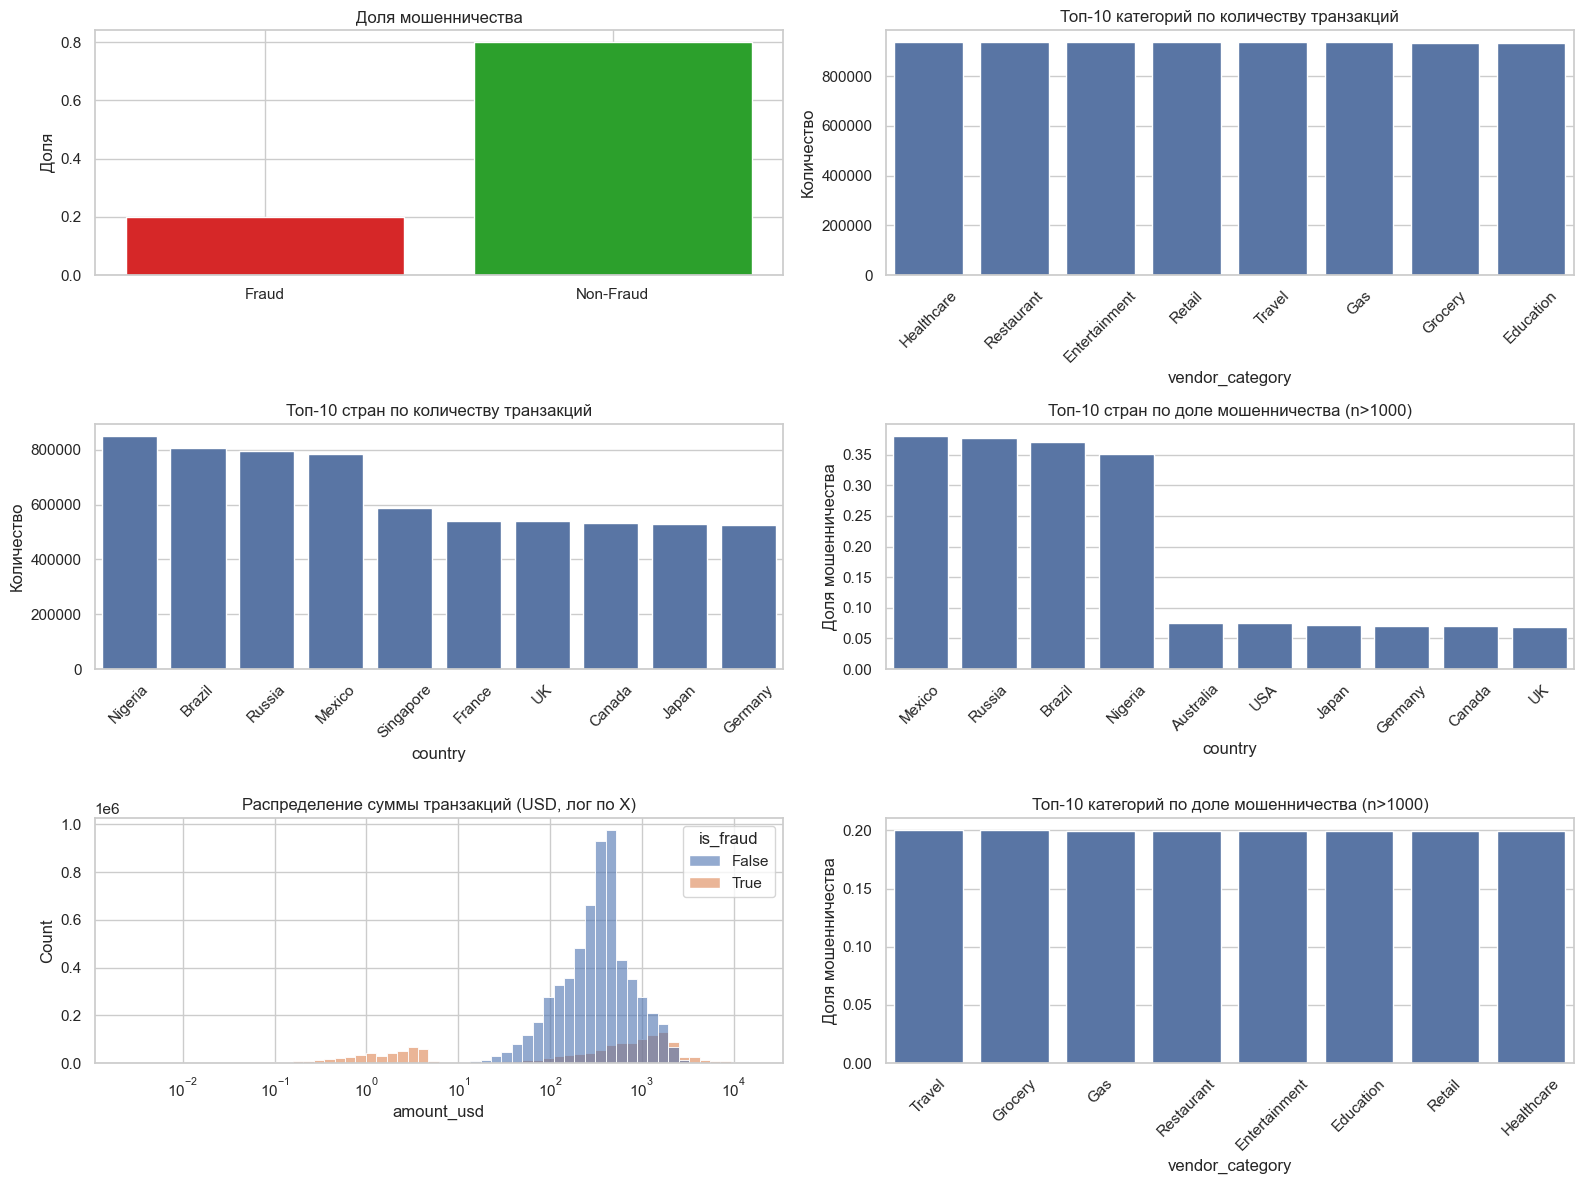

In [9]:
# --- Подготовка агрегатов ---
top_categories = df['vendor_category'].value_counts().head(10)

top_countries_count = df['country'].value_counts().head(10)

country_stats = (
    df.groupby('country')['is_fraud']
      .agg(['mean', 'count'])
      .rename(columns={'mean':'fraud_rate','count':'n'})
)
country_stats_filt = (
    country_stats[country_stats['n'] > 1000]
    .sort_values('fraud_rate', ascending=False)
    .head(10)
)

cat_stats = (
    df.groupby('vendor_category')['is_fraud']
      .agg(['mean','count'])
      .rename(columns={'mean':'fraud_rate','count':'n'})
)
cat_stats_filt = (
    cat_stats[cat_stats['n'] > 1000]
    .sort_values('fraud_rate', ascending=False)
    .head(10)
)


hist_df = df

# Визуализация
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))

# Доля мошенничества
ax = axes[0,0]
ax.bar(['Fraud','Non-Fraud'], [fraud_share, 1 - fraud_share], color=['#d62728','#2ca02c'])
ax.set_title("Доля мошенничества")
ax.set_ylabel("Доля")

# Топ-10 категорий по количеству транзакций
ax = axes[0,1]
sns.barplot(x=top_categories.index, y=top_categories.values, ax=ax)
ax.set_title("Топ-10 категорий по количеству транзакций")
ax.set_ylabel("Количество")
ax.set_xlabel("vendor_category")
ax.tick_params(axis='x', rotation=45)

# Топ-10 стран по количеству транзакций
ax = axes[1,0]
sns.barplot(x=top_countries_count.index, y=top_countries_count.values, ax=ax)
ax.set_title("Топ-10 стран по количеству транзакций")
ax.set_ylabel("Количество")
ax.set_xlabel("country")
ax.tick_params(axis='x', rotation=45)

# Топ-10 стран по доле мошенничества (min 1000 транзакций)
ax = axes[1,1]
sns.barplot(x=country_stats_filt.index, y=country_stats_filt['fraud_rate'], ax=ax)
ax.set_title("Топ-10 стран по доле мошенничества (n>1000)")
ax.set_ylabel("Доля мошенничества")
ax.set_xlabel("country")
ax.tick_params(axis='x', rotation=45)

# Распределение суммы транзакций в USD (лог-шкала по X)
ax = axes[2,0]
sns.histplot(
    data=hist_df,
    x='amount_usd',
    hue='is_fraud',
    bins=60,
    log_scale=(True, False),
    alpha=0.6,
    ax=ax
)
ax.set_title("Распределение суммы транзакций (USD, лог по X)")
ax.set_xlabel("amount_usd")

# Топ-10 категорий по доле мошенничества (min 1000 транзакций)
ax = axes[2,1]
sns.barplot(x=cat_stats_filt.index, y=cat_stats_filt['fraud_rate'], ax=ax)
ax.set_title("Топ-10 категорий по доле мошенничества (n>1000)")
ax.set_ylabel("Доля мошенничества")
ax.set_xlabel("vendor_category")
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## Выводы по текущим результатам

### 1. Общая доля мошенничества
- **~20%** транзакций помечены как мошеннические.  
- Это очень высокий уровень, что может говорить либо о высокой активности мошенников, либо о таком дизайне датасета :)

---

### 2. Топ категорий по количеству транзакций
- Лидируют: **Healthcare**, **Restaurant**, **Entertainment**, **Retail**, **Travel** с одинаковым кол-вом транзакций, данные сбалансированы относительно категорий

---

### 3. Топ стран по количеству транзакций
- **Nigeria**, **Brazil**, **Russia**, **Mexico** — лидеры по числу операций.
- В топ также входят страны: **UK**, **Canada**, **Japan**, **Germany**.

---

### 4. Топ стран по доле мошенничества
- Максимальные доли:
  - **Mexico**, **Russia**, **Brazil**, **Nigeria** 

---

### 5. Распределение суммы транзакций
- Основная масса операций: **10–10 000 USD**.
- У мошеннических операций распределение более **плоское** и с **большими хвостами**.
- Присутствует хвост из **очень крупных транзакций**.

---

### 6. Топ категорий по доле мошенничества
- У категорий-лидеров по кол-ву мошеннических транзакций одинаковая доля мошеннических транзакций, данные сбалансированы в датасете относительно категорий

## Дополнительные визуализации

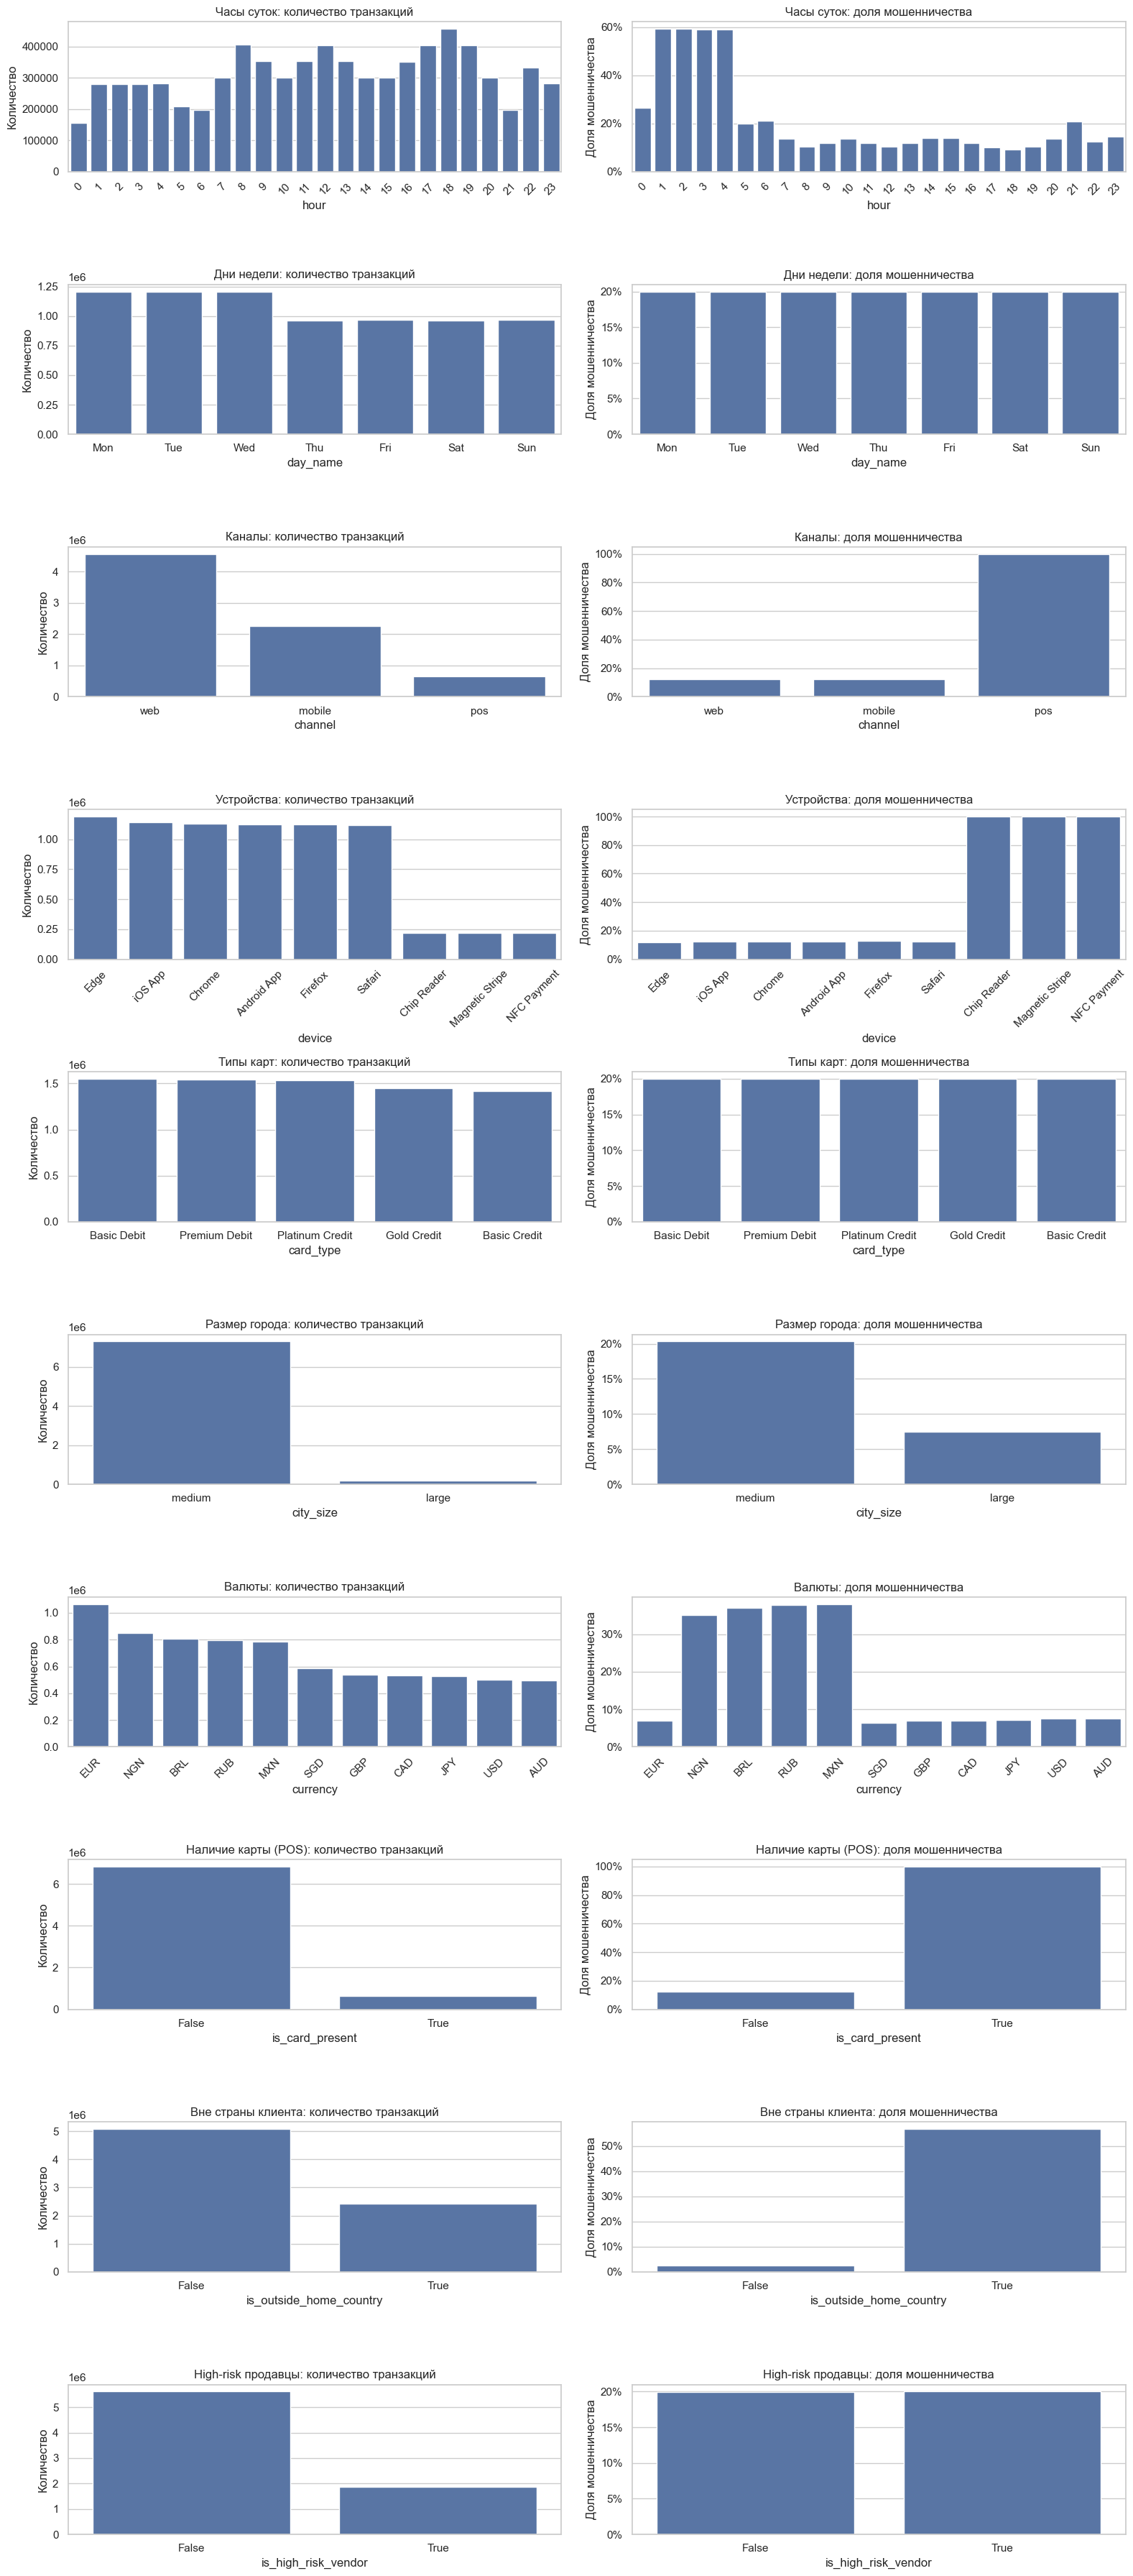

In [10]:
from matplotlib.ticker import FuncFormatter

# извлекаем час/день недели для временных срезов
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek  # 0=Mon
days_map = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['day_name'] = df['day_of_week'].map(days_map)


features = [
    ("hour", "Часы суток"),
    ("day_name", "Дни недели"),
    ("channel", "Каналы"),
    ("device", "Устройства"),
    ("card_type", "Типы карт"),
    ("city_size", "Размер города"),
    ("currency", "Валюты"),
    ("is_card_present", "Наличие карты (POS)"),
    ("is_outside_home_country", "Вне страны клиента"),
    ("is_high_risk_vendor", "High-risk продавцы"),
]

TOP_K = None  

sns.set_theme(style="whitegrid")
n_rows = len(features)
fig, axes = plt.subplots(n_rows, 2, figsize=(16, 3.6*n_rows))

def pct_fmt(x, _):
    return f"{x*100:.0f}%"

for r, (col, title) in enumerate(features):
    # агрегаты: количество и доля мошенничества
    stats = df.groupby(col)['is_fraud'].agg(['count', 'mean']).rename(columns={'count':'n', 'mean':'rate'})
    # удобный порядок категорий:
    if col == 'hour':
        stats = stats.sort_index()
    elif col == 'day_name':
        order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
        stats = stats.reindex(order)
    else:
        stats = stats.sort_values('n', ascending=False)
    if TOP_K is not None and len(stats) > TOP_K:
        stats = stats.head(TOP_K)

    # левый график: количество транзакций
    ax_left = axes[r, 0]
    sns.barplot(x=stats.index.astype(str), y=stats['n'], ax=ax_left)
    ax_left.set_title(f"{title}: количество транзакций")
    ax_left.set_xlabel(col)
    ax_left.set_ylabel("Количество")
    if stats.shape[0] > 8:
        ax_left.tick_params(axis='x', rotation=45)

    # правый график: доля мошенничества
    ax_right = axes[r, 1]
    sns.barplot(x=stats.index.astype(str), y=stats['rate'], ax=ax_right)
    ax_right.set_title(f"{title}: доля мошенничества")
    ax_right.set_xlabel(col)
    ax_right.set_ylabel("Доля мошенничества")
    ax_right.yaxis.set_major_formatter(FuncFormatter(pct_fmt))
    if stats.shape[0] > 8:
        ax_right.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## Выводы по временным и поведенческим паттернам

### 1. Время суток
- **Активность** растёт к вечеру; пик по количеству транзакций ≈ **17–19** часов.
- **Доля мошенничества** экстремально высока ночью: **≈ 00–04** — до ~**60%**, далее падает и днём держится на уровне **~10–15%** с небольшими вечерними всплесками.
- **Следует:** ужесточать правила/скоринг в ночные часы; для high-risk категорий — повышать фрод-скор.

---

### 2. Дни недели
- **Доля мошенничества почти стабильна** по дням (**~20%**), но в пн-ср больше транзакций

---

### 3. Канал (web / mobile / POS)
- По объёму лидирует **web**, затем **mobile**, **POS** — минимальная доля операций.
- **Фрод-рейт: POS ~ ~100%**, web/mobile — **~10–15%**.
- POS - плохо

---

### 4. Устройство
- Браузеры/приложения (**Edge, iOS App, Chrome, Android App, Firefox, Safari**) — фрод-рейт **~10–15%**.
- POS-устройства (**Chip Reader, Magnetic Stripe, NFC Payment**) — **≈100%** фрода.
- POS - плохо
---

### 5. Тип карты
- Объёмы по типам карт распределены равномерно.
- **Доли фрода практически одинаковы**

---

### 6. Размер города
- Почти все операции идут из **medium**-cities; **large** — доля мала.
- Фрод-рейт выше в **medium** , но для large **малая выборка**.

---

### 7. Валюта
- Наибольшие объёмы: **EUR, MXN, BRL, RUB** и др.
- Самые высокие фрод-рейты у **MXN, BRL, RUB, NGN** (≈**30%+**); у **EUR/USD/JPY/GBP/SGD/AUD** — заметно ниже.
- Соотносится со странами, в которых самая высокая доля фрода, но тут хорошо сочетать с транзакциями за пределами страны.

---

### 8. Наличие карты (is_card_present)
- По объёму преобладает **is_card_present=False**.
- **Если карта присутствует — фрод ≈ ~100%**; если нет — **~10%**.
- Крайне вероятна **утечка таргета** или правило разметки (например, все POS-кейсы размечены как фрод). Проверить качество данных.
- Логически не самый понятный признак

---

### 9. Вне страны клиента (is_outside_home_country)
- Транзакций «вне страны» меньше по объёму, но **фрод-рейт высокий (~57%+)**

---

### 10. High-risk продавцы (is_high_risk_vendor)
- Объём у **False** больше, чем у **True**.
- **Фрод-рейт** у **True** заметно выше (в разы относительно False), значит не зря такие вендоры отмечены рисковыми.



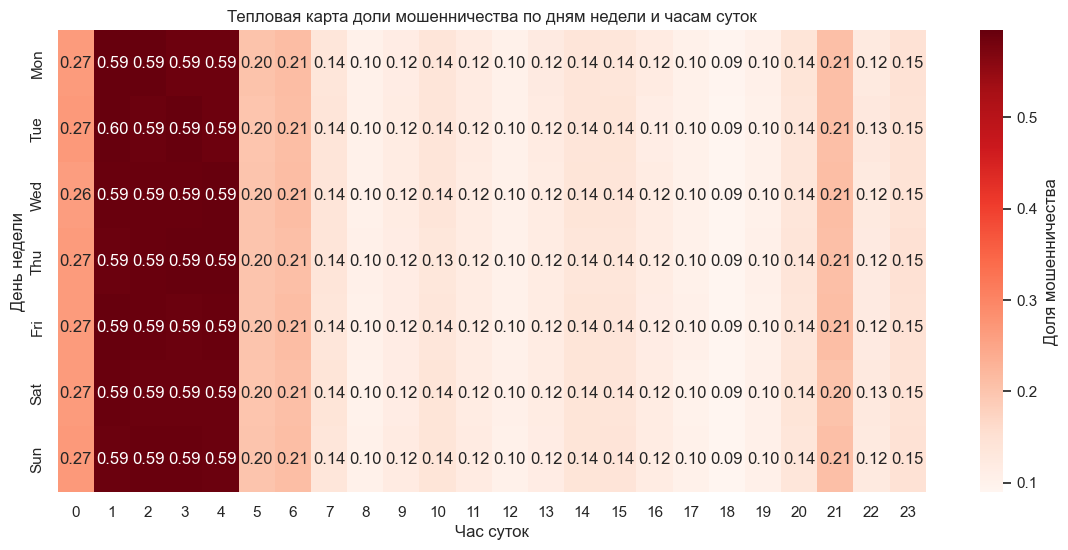

In [11]:
# Группировка по дню недели и часу
heatmap_data = (
    df.groupby(['day_of_week', 'hour'])['is_fraud']
      .mean()
      .reset_index()
      .pivot(index='day_of_week', columns='hour', values='is_fraud')
)

heatmap_data.index = heatmap_data.index.map(days_map)

plt.figure(figsize=(14, 6))
sns.heatmap(
    heatmap_data,
    cmap='Reds',
    annot=True,
    fmt=".2f",
    cbar_kws={'label': 'Доля мошенничества'}
)
plt.title("Тепловая карта доли мошенничества по дням недели и часам суток")
plt.xlabel("Час суток")
plt.ylabel("День недели")
plt.show()


In [12]:
df

,transaction_id,customer_id,card_number,timestamp,vendor_category,vendor_type,vendor,amount,currency,country,...,last_hour_unique_merchants,last_hour_unique_countries,last_hour_max_single_amount,rate,amount_usd,last_hour_total_amount_usd,last_hour_max_single_amount_usd,hour,day_of_week,day_name
0,TX_a0ad2a2a,CUST_72886,6646734767813109,2024-09-30 00:00:01.034820,Restaurant,fast_food,Taco Bell,294.87,GBP,UK,...,105,12,1.925481e+06,0.747153,394.658011,4.483492e+07,2.577089e+06,0,0,Mon
1,TX_3599c101,CUST_70474,376800864692727,2024-09-30 00:00:01.764464,Entertainment,gaming,Steam,3368.97,BRL,Brazil,...,100,12,5.149117e+06,5.434649,619.905757,3.701207e+06,9.474609e+05,0,0,Mon
2,TX_a9461c6d,CUST_10715,5251909460951913,2024-09-30 00:00:02.273762,Grocery,physical,Whole Foods,102582.38,JPY,Japan,...,97,12,1.852242e+06,142.573268,719.506409,2.746928e+05,1.299151e+04,0,0,Mon
3,TX_7be21fc4,CUST_16193,376079286931183,2024-09-30 00:00:02.297466,Gas,major,Exxon,630.60,AUD,Australia,...,105,12,2.055798e+06,1.443654,436.808287,1.524784e+07,1.424024e+06,0,0,Mon
4,TX_150f490b,CUST_87572,6172948052178810,2024-09-30 00:00:02.544063,Healthcare,medical,Medical Center,724949.27,NGN,Nigeria,...,88,12,1.157231e+06,1668.736400,434.430069,2.892989e+03,6.934776e+02,0,0,Mon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7483761,TX_58a762fa,CUST_11344,377055034743699,2024-10-30 23:59:58.926575,Retail,online,AliExpress,887.32,SGD,Singapore,...,1,1,8.873226e+02,1.323643,670.362079,1.149682e+03,6.703641e+02,23,2,Wed
7483762,TX_dabcf671,CUST_38961,373625915641065,2024-10-30 23:59:58.950801,Grocery,physical,Kroger,356.06,EUR,France,...,0,0,3.560645e+02,0.923864,385.402905,3.854078e+02,3.854078e+02,23,2,Wed
7483763,TX_ab567eb4,CUST_75576,6702342842796660,2024-10-30 23:59:58.972155,Grocery,physical,Kroger,391.96,SGD,Singapore,...,0,0,3.919607e+02,1.323643,296.122166,2.961227e+02,2.961227e+02,23,2,Wed
7483764,TX_5ae61846,CUST_82508,374615717295581,2024-10-30 23:59:58.996608,Retail,online,eBay,601.71,USD,USA,...,2,1,6.017100e+02,1.000000,601.710000,1.474510e+03,6.017100e+02,23,2,Wed


## Добавим фичи

In [13]:

# === Временные признаки ===
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['is_weekend_day'] = df['day_of_week'].isin([5,6]).astype(int) # вместо is_weekend, тк это в дальнейшем категориальную фичу лучше представить как числовое значение
df['is_night'] = df['hour'].between(0, 5).astype(int)


# === Поведенческие признаки ===
# относительные к поведению клиента
client_median_amount = df.groupby('customer_id')['amount_usd'].transform('median')
df['rel_amount_to_client_median'] = df['amount_usd'] / (client_median_amount + 1e-5)

df['rel_amount_to_last_hour_max'] = df['amount_usd'] / (df['last_hour_max_single_amount_usd'] + 1e-5)
df['rel_amount_to_last_hour_total'] = df['amount_usd'] / (df['last_hour_total_amount_usd'] + 1e-5)

# === Гео/валютные признаки ===
high_risk_currencies = ['MXN', 'BRL', 'RUB', 'NGN']
df['is_high_risk_currency'] = df['currency'].isin(high_risk_currencies).astype(int)

# страна high-risk из EDA
high_risk_countries = ['Mexico', 'Russia', 'Brazil', 'Nigeria']
df['is_high_risk_country'] = df['country'].isin(high_risk_countries).astype(int)



In [14]:
df

,transaction_id,customer_id,card_number,timestamp,vendor_category,vendor_type,vendor,amount,currency,country,...,hour,day_of_week,day_name,is_weekend_day,is_night,rel_amount_to_client_median,rel_amount_to_last_hour_max,rel_amount_to_last_hour_total,is_high_risk_currency,is_high_risk_country
0,TX_a0ad2a2a,CUST_72886,6646734767813109,2024-09-30 00:00:01.034820,Restaurant,fast_food,Taco Bell,294.87,GBP,UK,...,0,0,Mon,0,1,0.453112,0.000153,0.000009,0,0
1,TX_3599c101,CUST_70474,376800864692727,2024-09-30 00:00:01.764464,Entertainment,gaming,Steam,3368.97,BRL,Brazil,...,0,0,Mon,0,1,0.505310,0.000654,0.000167,1,1
2,TX_a9461c6d,CUST_10715,5251909460951913,2024-09-30 00:00:02.273762,Grocery,physical,Whole Foods,102582.38,JPY,Japan,...,0,0,Mon,0,1,0.981861,0.055383,0.002619,0,0
3,TX_7be21fc4,CUST_16193,376079286931183,2024-09-30 00:00:02.297466,Gas,major,Exxon,630.60,AUD,Australia,...,0,0,Mon,0,1,1.123669,0.000307,0.000029,0,0
4,TX_150f490b,CUST_87572,6172948052178810,2024-09-30 00:00:02.544063,Healthcare,medical,Medical Center,724949.27,NGN,Nigeria,...,0,0,Mon,0,1,1.945364,0.626452,0.150167,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7483761,TX_58a762fa,CUST_11344,377055034743699,2024-10-30 23:59:58.926575,Retail,online,AliExpress,887.32,SGD,Singapore,...,23,2,Wed,0,0,1.458745,0.999997,0.583085,0,0
7483762,TX_dabcf671,CUST_38961,373625915641065,2024-10-30 23:59:58.950801,Grocery,physical,Kroger,356.06,EUR,France,...,23,2,Wed,0,0,0.675919,0.999987,0.999987,0,0
7483763,TX_ab567eb4,CUST_75576,6702342842796660,2024-10-30 23:59:58.972155,Grocery,physical,Kroger,391.96,SGD,Singapore,...,23,2,Wed,0,0,0.807837,0.999998,0.999998,0,0
7483764,TX_5ae61846,CUST_82508,374615717295581,2024-10-30 23:59:58.996608,Retail,online,eBay,601.71,USD,USA,...,23,2,Wed,0,0,2.726371,1.000000,0.408075,0,0


## Проверка признаков на утечку таргета

In [15]:
def check_leakage(df, col, target='is_fraud', min_count=100):
    stats = df.groupby(col)[target].agg(['mean', 'count']).sort_values('mean', ascending=False)
    stats['mean_pct'] = stats['mean'] * 100
    suspicious = stats[(stats['count'] > min_count) & ((stats['mean'] < 0.05) | (stats['mean'] > 0.95))]
    return stats, suspicious

categorical_cols = [
    'channel', 'device', 'card_type', 'city_size', 'currency', 
    'is_card_present', 'is_outside_home_country', 'is_high_risk_vendor'
]

for col in categorical_cols:
    stats, suspicious = check_leakage(df, col)
    print(f"\n=== {col} ===")
    print(stats)
    if not suspicious.empty:
        print("Возможная утечка:")
        print(suspicious)



=== channel ===
             mean    count    mean_pct
channel                               
pos      1.000000   651047  100.000000
mobile   0.123878  2269578   12.387765
web      0.123275  4563141   12.327517
Возможная утечка:
         mean   count  mean_pct
channel                        
pos       1.0  651047     100.0

=== device ===
                     mean    count    mean_pct
device                                        
Chip Reader      1.000000   217324  100.000000
Magnetic Stripe  1.000000   217204  100.000000
NFC Payment      1.000000   216519  100.000000
Firefox          0.126831  1120952   12.683059
Safari           0.126204  1120245   12.620364
Android App      0.125070  1126117   12.507049
Chrome           0.123710  1132384   12.370980
iOS App          0.122703  1143461   12.270292
Edge             0.116753  1189560   11.675325
Возможная утечка:
                 mean   count  mean_pct
device                                 
Chip Reader       1.0  217324     100.0
Mag

Cудя по результатам, у нас есть несколько признаков с явной утечкой таргета:

channel: pos = 100% fraud 

device: Chip Reader, Magnetic Stripe, NFC Payment = 100% fraud 

is_card_present: True = 100% fraud 


is_outside_home_country - наблюдается диспропорция, но у мошенников не принято работать внутри страны, тк так выше шанс быстро столкнуться с правосудием, так что тут все логично.

Остальные поля сверху, несмотря на то, что они кажутся очень сильными признаками, придется не включать в модель, поскольку они повлияют на точность.

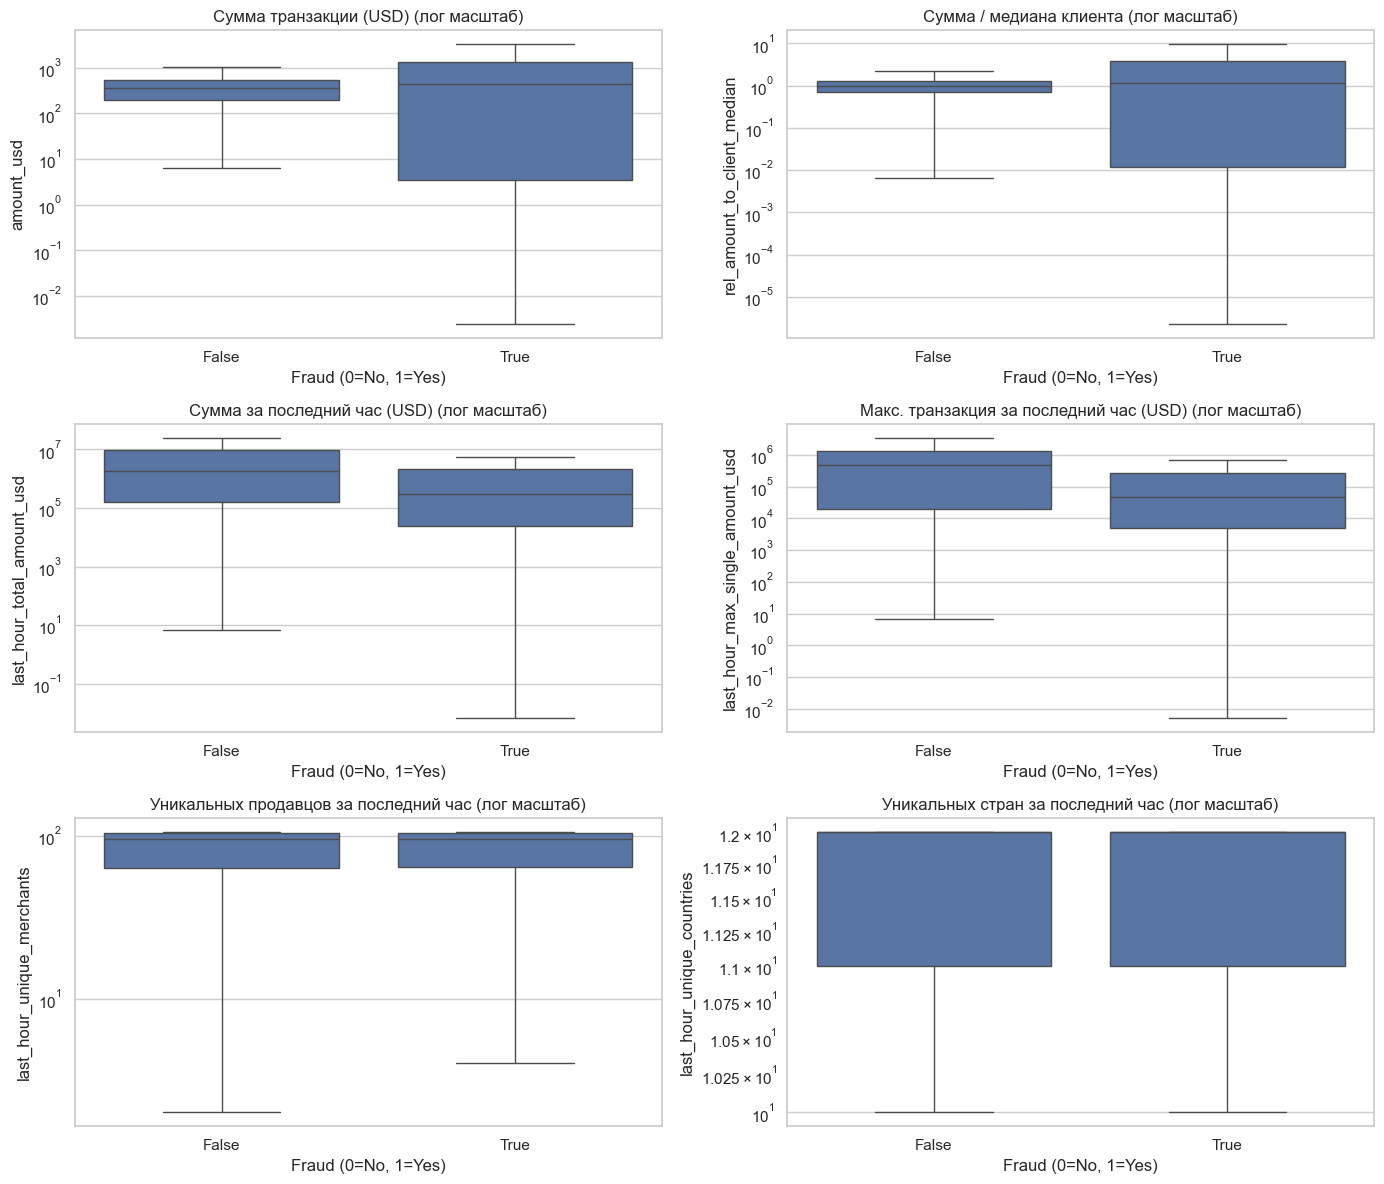

,feature,median,fraud_rate_above_median,fraud_rate_below_median,mannwhitney_pval,roc_auc
0,amount_usd,3.592600e+02,0.213283,0.186173,0.000000e+00,0.511715
1,rel_amount_to_client_median,1.000000e+00,0.207964,0.191493,0.000000e+00,0.513880
2,last_hour_total_amount_usd,1.268625e+06,0.127791,0.271666,0.000000e+00,0.351612
3,last_hour_max_single_amount_usd,2.490535e+05,0.104196,0.295260,0.000000e+00,0.336425
4,last_hour_unique_merchants,9.500000e+01,0.201098,0.198405,1.120554e-49,0.503895
5,last_hour_unique_countries,1.200000e+01,NaN,0.199728,6.407177e-53,0.503371


In [16]:
from scipy.stats import mannwhitneyu
from sklearn.metrics import roc_auc_score


# Признак: сумма относительно медианы клиента
# client_median_amount = df.groupby('customer_id')['amount_usd'].transform('median')
# df['rel_amount_to_client_median'] = df['amount_usd'] / (client_median_amount + 1e-5)

features_to_check = [
    ('amount_usd', 'Сумма транзакции (USD)'),
    ('rel_amount_to_client_median', 'Сумма / медиана клиента'),
    ('last_hour_total_amount_usd', 'Сумма за последний час (USD)'),
    ('last_hour_max_single_amount_usd', 'Макс. транзакция за последний час (USD)'),
    ('last_hour_unique_merchants', 'Уникальных продавцов за последний час'),
    ('last_hour_unique_countries', 'Уникальных стран за последний час'),
]

results = []

n_cols = 2
n_rows = int(np.ceil(len(features_to_check) / n_cols))
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten()

for i, (col, title) in enumerate(features_to_check):
    # Статистический тест
    fraud_vals = df.loc[df['is_fraud'], col]
    nonfraud_vals = df.loc[~df['is_fraud'], col]
    u_stat, p_val = mannwhitneyu(fraud_vals, nonfraud_vals, alternative='two-sided')
    
    # ROC-AUC 
    auc_val = roc_auc_score(df['is_fraud'], df[col])
    
    # Бинаризация по медиане
    threshold = df[col].median()
    fraud_rate_above = df[df[col] > threshold]['is_fraud'].mean()
    fraud_rate_below = df[df[col] <= threshold]['is_fraud'].mean()
    
    results.append({
        'feature': col,
        'median': threshold,
        'fraud_rate_above_median': fraud_rate_above,
        'fraud_rate_below_median': fraud_rate_below,
        'mannwhitney_pval': p_val,
        'roc_auc': auc_val
    })
    
    # Визуализация
    sns.boxplot(x='is_fraud', y=col, data=df, showfliers=False, ax=axes[i])
    axes[i].set_yscale('log')
    axes[i].set_title(f"{title} (лог масштаб)")
    axes[i].set_xlabel("Fraud (0=No, 1=Yes)")
    axes[i].set_ylabel(col)


for j in range(len(features_to_check), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Таблица с результатами
results_df = pd.DataFrame(results)
display(results_df)


## Анализ числовых признаков и их связь с мошенничеством

### 1. **Сумма транзакции (`amount_usd`)**
- Медианные значения у fraud и non-fraud транзакций **схожи**, но разброс у мошеннических значительно шире.

---

### 2. **Отношение суммы транзакции к медиане клиента (`rel_amount_to_client_median`)**
- У большинства клиентов fraud-транзакции имеют **значительные отклонения от их медианной суммы**.
- Это может быть признаком необычного поведения.

---

### 3. **Общая сумма за последний час (`last_hour_total_amount_usd`)**
- Fraud-транзакции часто сопровождаются **меньшими суммами за последний час**, чем у обычных.

---

### 4. **Максимальная сумма за последний час (`last_hour_max_single_amount_usd`)**
- У fraud транзакций медианное значение чуть ниже, но разброс значительно выше.

---

### 5. **Количество уникальных продавцов за последний час (`last_hour_unique_merchants`)**
- Fraud не сильно зависит от этого признака

---

### Статистические тесты
- Для большинства признаков p-value < 0.05, что указывает на **статистически значимые различия** между fraud и non-fraud транзакциями.
- Наиболее информативными выглядят:
  - `amount_usd`
  - `rel_amount_to_client_median`
  - `last_hour_total_amount_usd`
  - `last_hour_max_single_amount_usd`


# Готовим данные для построения ML модели


In [17]:
df.columns

Index(['transaction_id', 'customer_id', 'card_number', 'timestamp',
       'vendor_category', 'vendor_type', 'vendor', 'amount', 'currency',
       'country', 'city', 'city_size', 'card_type', 'is_card_present',
       'device', 'channel', 'device_fingerprint', 'ip_address',
       'is_outside_home_country', 'is_high_risk_vendor', 'is_weekend',
       'last_hour_activity', 'is_fraud', 'date', 'last_hour_num_transactions',
       'last_hour_total_amount', 'last_hour_unique_merchants',
       'last_hour_unique_countries', 'last_hour_max_single_amount', 'rate',
       'amount_usd', 'last_hour_total_amount_usd',
       'last_hour_max_single_amount_usd', 'hour', 'day_of_week', 'day_name',
       'is_weekend_day', 'is_night', 'rel_amount_to_client_median',
       'rel_amount_to_last_hour_max', 'rel_amount_to_last_hour_total',
       'is_high_risk_currency', 'is_high_risk_country'],
      dtype='object')

In [18]:
df

,transaction_id,customer_id,card_number,timestamp,vendor_category,vendor_type,vendor,amount,currency,country,...,hour,day_of_week,day_name,is_weekend_day,is_night,rel_amount_to_client_median,rel_amount_to_last_hour_max,rel_amount_to_last_hour_total,is_high_risk_currency,is_high_risk_country
0,TX_a0ad2a2a,CUST_72886,6646734767813109,2024-09-30 00:00:01.034820,Restaurant,fast_food,Taco Bell,294.87,GBP,UK,...,0,0,Mon,0,1,0.453112,0.000153,0.000009,0,0
1,TX_3599c101,CUST_70474,376800864692727,2024-09-30 00:00:01.764464,Entertainment,gaming,Steam,3368.97,BRL,Brazil,...,0,0,Mon,0,1,0.505310,0.000654,0.000167,1,1
2,TX_a9461c6d,CUST_10715,5251909460951913,2024-09-30 00:00:02.273762,Grocery,physical,Whole Foods,102582.38,JPY,Japan,...,0,0,Mon,0,1,0.981861,0.055383,0.002619,0,0
3,TX_7be21fc4,CUST_16193,376079286931183,2024-09-30 00:00:02.297466,Gas,major,Exxon,630.60,AUD,Australia,...,0,0,Mon,0,1,1.123669,0.000307,0.000029,0,0
4,TX_150f490b,CUST_87572,6172948052178810,2024-09-30 00:00:02.544063,Healthcare,medical,Medical Center,724949.27,NGN,Nigeria,...,0,0,Mon,0,1,1.945364,0.626452,0.150167,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7483761,TX_58a762fa,CUST_11344,377055034743699,2024-10-30 23:59:58.926575,Retail,online,AliExpress,887.32,SGD,Singapore,...,23,2,Wed,0,0,1.458745,0.999997,0.583085,0,0
7483762,TX_dabcf671,CUST_38961,373625915641065,2024-10-30 23:59:58.950801,Grocery,physical,Kroger,356.06,EUR,France,...,23,2,Wed,0,0,0.675919,0.999987,0.999987,0,0
7483763,TX_ab567eb4,CUST_75576,6702342842796660,2024-10-30 23:59:58.972155,Grocery,physical,Kroger,391.96,SGD,Singapore,...,23,2,Wed,0,0,0.807837,0.999998,0.999998,0,0
7483764,TX_5ae61846,CUST_82508,374615717295581,2024-10-30 23:59:58.996608,Retail,online,eBay,601.71,USD,USA,...,23,2,Wed,0,0,2.726371,1.000000,0.408075,0,0


In [19]:
df_cleaned = df.copy()

# чистка
leak_cols = ['channel', 'device', 'is_card_present']  # явные утечки
drop_cols = [
    'transaction_id', 'customer_id', 'card_number', 'timestamp',
    'device_fingerprint', 'ip_address',
    'date', 'day_name', 'is_weekend', # уже преобразованы в числовые признаки в других полях
    'vendor', 'city',  
    'last_hour_activity',  # исходная вложенная структура
    'amount', 'rate',  # первичные поля до конвертации
    'last_hour_total_amount', 'last_hour_max_single_amount'  # до конвертации в USD
]
df_cleaned = df_cleaned.drop(columns=[c for c in leak_cols + drop_cols if c in df_cleaned.columns])

In [20]:
df_cleaned

,vendor_category,vendor_type,currency,country,city_size,card_type,is_outside_home_country,is_high_risk_vendor,is_fraud,last_hour_num_transactions,...,last_hour_max_single_amount_usd,hour,day_of_week,is_weekend_day,is_night,rel_amount_to_client_median,rel_amount_to_last_hour_max,rel_amount_to_last_hour_total,is_high_risk_currency,is_high_risk_country
0,Restaurant,fast_food,GBP,UK,medium,Platinum Credit,False,False,False,1197,...,2.577089e+06,0,0,0,1,0.453112,0.000153,0.000009,0,0
1,Entertainment,gaming,BRL,Brazil,medium,Platinum Credit,True,True,True,509,...,9.474609e+05,0,0,0,1,0.505310,0.000654,0.000167,1,1
2,Grocery,physical,JPY,Japan,medium,Platinum Credit,False,False,False,332,...,1.299151e+04,0,0,0,1,0.981861,0.055383,0.002619,0,0
3,Gas,major,AUD,Australia,medium,Premium Debit,False,False,False,764,...,1.424024e+06,0,0,0,1,1.123669,0.000307,0.000029,0,0
4,Healthcare,medical,NGN,Nigeria,medium,Basic Debit,True,False,True,218,...,6.934776e+02,0,0,0,1,1.945364,0.626452,0.150167,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7483761,Retail,online,SGD,Singapore,medium,Premium Debit,False,False,False,1,...,6.703641e+02,23,2,0,0,1.458745,0.999997,0.583085,0,0
7483762,Grocery,physical,EUR,France,medium,Platinum Credit,False,False,False,0,...,3.854078e+02,23,2,0,0,0.675919,0.999987,0.999987,0,0
7483763,Grocery,physical,SGD,Singapore,medium,Premium Debit,False,False,False,0,...,2.961227e+02,23,2,0,0,0.807837,0.999998,0.999998,0,0
7483764,Retail,online,USD,USA,large,Basic Credit,False,False,False,2,...,6.017100e+02,23,2,0,0,2.726371,1.000000,0.408075,0,0


In [21]:
# Целевая переменная и списки признаков
target_col = 'is_fraud'

numeric_features = [
    'amount_usd',
    'last_hour_total_amount_usd',
    'last_hour_max_single_amount_usd',
    'last_hour_unique_merchants',
    'last_hour_unique_countries',
    'rel_amount_to_client_median',
    'rel_amount_to_last_hour_max',
    'rel_amount_to_last_hour_total',
]

categorical_features = [
    'vendor_category',
    'vendor_type',
    'country',
    'currency',
    'city_size',
    'card_type',
    'is_outside_home_country',
    'is_high_risk_vendor'
]

num_cat_features = [
    'hour',
    'day_of_week',
    'is_weekend_day',
    'is_night',
    'is_high_risk_currency',
    'is_high_risk_country',
]

# Пропусков в данных у нас нет


# Строим Пайплайн

In [25]:
# train_test_split со стратификацией (чтобы распределение целевого признака было одинаковым на тесте и на трейне)
X = df_cleaned.drop(columns=[target_col])
y = df_cleaned[target_col].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)


# Препроцессор
preprocessor = ColumnTransformer(
    transformers=[
        ("num", RobustScaler(), numeric_features), 
        ("bin", "passthrough", num_cat_features),  
        ("cat", OneHotEncoder(handle_unknown='ignore', drop='if_binary', sparse_output=True), categorical_features),
    ],
    remainder='drop',
    sparse_threshold=1.0
)


## Pipeline с GridSearch. Не удалось с ним поработать.

In [ ]:
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

rf_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(
        class_weight="balanced_subsample",
        n_jobs=-1,
        random_state=42
    ))
])

lgbm_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LGBMClassifier(
        random_state=42,
        n_jobs=-1
    ))
])

rf_grid = {
    "model__n_estimators": [200, 400],
    "model__max_depth": [None, 20],
    "model__min_samples_split": [2, 5],
    "model__min_samples_leaf": [1, 2],
    "model__max_features": ["sqrt"]
}

lgbm_grid = {
    "model__n_estimators": [300, 600],
    "model__learning_rate": [0.05, 0.1],
    "model__num_leaves": [31, 63],
    "model__max_depth": [-1, 10],
    "model__subsample": [0.8, 1.0],
    "model__colsample_bytree": [0.8, 1.0]
}

In [ ]:
def run_grid(name, pipe, grid):
    print(f"\n🔍 GridSearchCV: {name}")
    gscv = GridSearchCV(
        estimator=pipe,
        param_grid=grid,
        cv=cv,
        scoring="roc_auc",
        n_jobs=-1,
        verbose=2,
        refit=True
    )
    gscv.fit(X_train, y_train)
    best_est = gscv.best_estimator_
    y_prob = best_est.predict_proba(X_test)[:, 1]
    y_pred = (y_prob >= 0.5).astype(int)

    # базовые метрики @0.5
    metrics_05 = {
        "ROC-AUC": roc_auc_score(y_test, y_prob),
        "PR-AUC": average_precision_score(y_test, y_prob),
        "Precision@0.5": precision_score(y_test, y_pred),
        "Recall@0.5": recall_score(y_test, y_pred),
        "F1@0.5": f1_score(y_test, y_pred),
        "CM@0.5": confusion_matrix(y_test, y_pred)
    }

    # подбор порога по максимальному F1
    prec, rec, thr = precision_recall_curve(y_test, y_prob)
    f1_vals = 2 * (prec * rec) / (prec + rec + 1e-12)
    best_idx = np.nanargmax(f1_vals[:-1]) if len(thr) else 0
    thr_f1 = thr[best_idx] if len(thr) else 0.5
    y_pred_f1 = (y_prob >= thr_f1).astype(int)
    metrics_bestF1 = {
        "threshold": float(thr_f1),
        "Precision": precision_score(y_test, y_pred_f1),
        "Recall": recall_score(y_test, y_pred_f1),
        "F1": f1_score(y_test, y_pred_f1),
        "CM": confusion_matrix(y_test, y_pred_f1)
    }

    # порог под требуемую точность (пример: >= 0.90)
    target_precision = 0.90
    idxs = np.where(prec[:-1] >= target_precision)[0]
    if len(idxs) > 0:
        idx_p = idxs[np.argmax(rec[idxs])]
        thr_p = thr[idx_p]
        y_pred_p = (y_prob >= thr_p).astype(int)
        metrics_p90 = {
            "threshold": float(thr_p),
            "Precision": precision_score(y_test, y_pred_p),
            "Recall": recall_score(y_test, y_pred_p),
            "F1": f1_score(y_test, y_pred_p),
            "CM": confusion_matrix(y_test, y_pred_p)
        }
    else:
        metrics_p90 = {"threshold": None, "Precision": None, "Recall": None, "F1": None, "CM": None}

    print(f"✅ {name} | ROC-AUC={metrics_05['ROC-AUC']:.4f} | PR-AUC={metrics_05['PR-AUC']:.4f}")
    print(f"   Best params: {gscv.best_params_}")
    print(f"   @0.5: P={metrics_05['Precision@0.5']:.3f} R={metrics_05['Recall@0.5']:.3f} F1={metrics_05['F1@0.5']:.3f}")
    print(f"   @bestF1 thr={metrics_bestF1['threshold']:.4f}: P={metrics_bestF1['Precision']:.3f} R={metrics_bestF1['Recall']:.3f} F1={metrics_bestF1['F1']:.3f}")
    if metrics_p90['threshold'] is not None:
        print(f"   @P>=0.90 thr={metrics_p90['threshold']:.4f}: P={metrics_p90['Precision']:.3f} R={metrics_p90['Recall']:.3f} F1={metrics_p90['F1']:.3f}")
    else:
        print("   Порог с precision≥0.90 не найден на тесте.")

    return {
        "name": name,
        "best_estimator": best_est,
        "best_params": gscv.best_params_,
        "y_prob": y_prob,
        "metrics@0.5": metrics_05,
        "metrics@bestF1": metrics_bestF1,
        "metrics@P90": metrics_p90
    }

In [ ]:
rf_res   = run_grid("RandomForest", rf_pipe, rf_grid)
lgbm_res = run_grid("LightGBM",   lgbm_pipe, lgbm_grid)

# ——— Сводная таблица по моделям ———
def summarize(res_list):
    rows = []
    for r in res_list:
        m05 = r["metrics@0.5"]; mF = r["metrics@bestF1"]; mP = r["metrics@P90"]
        rows.append({
            "model": r["name"],
            "ROC-AUC": m05["ROC-AUC"],
            "PR-AUC": m05["PR-AUC"],
            "P@0.5": m05["Precision@0.5"], "R@0.5": m05["Recall@0.5"], "F1@0.5": m05["F1@0.5"],
            "thr_bestF1": mF["threshold"], "P_bestF1": mF["Precision"], "R_bestF1": mF["Recall"], "F1_bestF1": mF["F1"],
            "thr_P90": mP["threshold"], "P_P90": mP["Precision"], "R_P90": mP["Recall"], "F1_P90": mP["F1"],
        })
    return pd.DataFrame(rows).sort_values("PR-AUC", ascending=False)

summary_df = summarize([rf_res, lgbm_res])
print("\n📊 Summary:")
print(summary_df)


🔍 GridSearchCV: RandomForest
Fitting 3 folds for each of 16 candidates, totalling 48 fits


KeyboardInterrupt: 

In [ ]:
# ——— ROC и PR кривые ———
plt.figure(figsize=(6,5))
for r in [rf_res, lgbm_res]:
    fpr, tpr, _ = roc_curve(y_test, r["y_prob"])
    plt.plot(fpr, tpr, label=r["name"])
plt.plot([0,1],[0,1],'--', color='gray', lw=1)
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC curves (test)"); plt.legend(); plt.show()

plt.figure(figsize=(6,5))
for r in [rf_res, lgbm_res]:
    prec, rec, _ = precision_recall_curve(y_test, r["y_prob"])
    plt.plot(rec, prec, label=r["name"])
plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("Precision–Recall curves (test)"); 
plt.legend(); 
plt.show()

## Просто обучение модели. Быстро.

In [27]:
rf_fast = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=200,             
        max_depth=12,                 
        min_samples_split=5,
        min_samples_leaf=2,
        max_features="sqrt",
        class_weight="balanced_subsample",
        n_jobs=-1,
        random_state=42
    ))
])

# обучение
rf_fast.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(sparse_threshold=1.0,
                                   transformers=[('num', RobustScaler(),
                                                  ['amount_usd',
                                                   'last_hour_total_amount_usd',
                                                   'last_hour_max_single_amount_usd',
                                                   'last_hour_unique_merchants',
                                                   'last_hour_unique_countries',
                                                   'rel_amount_to_client_median',
                                                   'rel_amount_to_last_hour_max',
                                                   'rel_amount_to_last_hour_total']),
                                                 ('bin', 'passth...
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'),
                                                  ['vendor_category',
                                                   'vendor_type', 'country',
                                                   'currency', 'city_size',
                                                   'card_type',
                                                   'is_outside_home_country',
                                                   'is_high_risk_vendor'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        max_depth=12, min_samples_leaf=2,
                                        min_samples_split=5, n_estimators=200,
                                        n_jobs=-1, random_state=42))])

In [28]:
# предсказания и базовые метрики (порог 0.5) ====
y_prob = rf_fast.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)

roc = roc_auc_score(y_test, y_prob)
pr  = average_precision_score(y_test, y_prob)
p05 = precision_score(y_test, y_pred)
r05 = recall_score(y_test, y_pred)
f05 = f1_score(y_test, y_pred)

print(f"\nRandomForest (fast) — базовые метрики @0.5")
print(f"ROC-AUC: {roc:.4f} | PR-AUC: {pr:.4f}")
print(f"Precision: {p05:.3f} | Recall: {r05:.3f} | F1: {f05:.3f}")
print("Confusion matrix @0.5:\n", confusion_matrix(y_test, y_pred))


RandomForest (fast) — базовые метрики @0.5
ROC-AUC: 0.9882 | PR-AUC: 0.9659
Precision: 0.808 | Recall: 0.948 | F1: 0.872
Confusion matrix @0.5:
 [[1130357   67453]
 [  15552  283392]]



@bestF1 threshold=0.6301 | P=0.887 | R=0.916 | F1=0.901


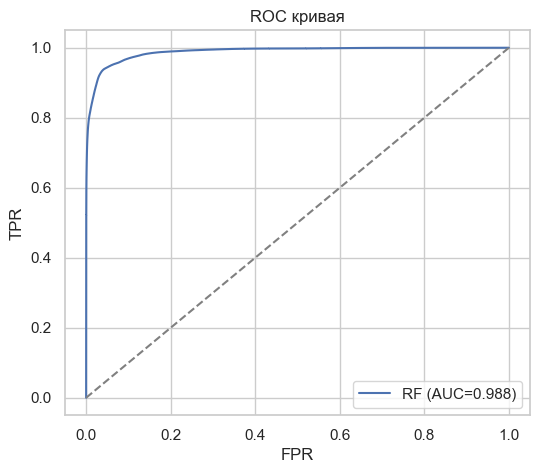

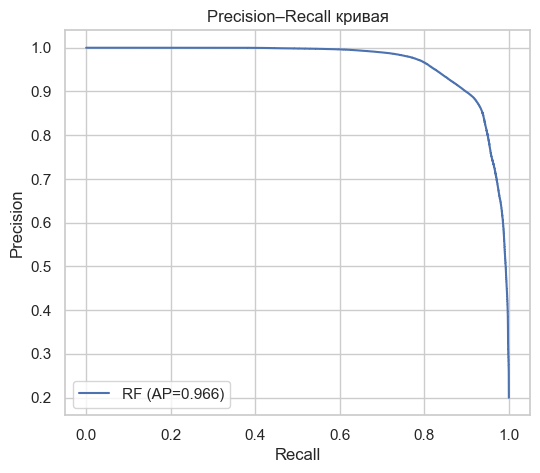

In [29]:
# === Подбор порога по максимальному F1 ===
prec, rec, thr = precision_recall_curve(y_test, y_prob)
f1_vals = 2 * (prec * rec) / (prec + rec + 1e-12)
if len(thr) > 0:
    best_idx = np.nanargmax(f1_vals[:-1])
    thr_f1 = thr[best_idx]
    y_pred_f1 = (y_prob >= thr_f1).astype(int)
    print(f"\n@bestF1 threshold={thr_f1:.4f} | "
          f"P={precision_score(y_test, y_pred_f1):.3f} "
          f"| R={recall_score(y_test, y_pred_f1):.3f} "
          f"| F1={f1_score(y_test, y_pred_f1):.3f}")
else:
    print("\nНе удалось рассчитать порог по F1.")

# === ROC кривая ===
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'RF (AUC={roc:.3f})')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC кривая"); plt.legend(); plt.show()

# === Precision–Recall кривая ===
plt.figure(figsize=(6,5))
plt.plot(rec, prec, label=f'RF (AP={pr:.3f})')
plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("Precision–Recall кривая"); plt.legend(); plt.show()

Порог **(0.6301)** позволяет сбалансировать точность и полноту, снижая количество ложноположительных срабатываний при минимальной потере полноты.

Даже базовая настройка RandomForest с учетом балансировки классов дает очень высокое качество. Для продакшена потребуется дополнительная калибровка порога, возможно использование других моделей или тщательная настройка гиперпараметров, но уже сейчас модель уверенно выявляет большинство мошеннических транзакций.

## Оценим Feature Importance в модели

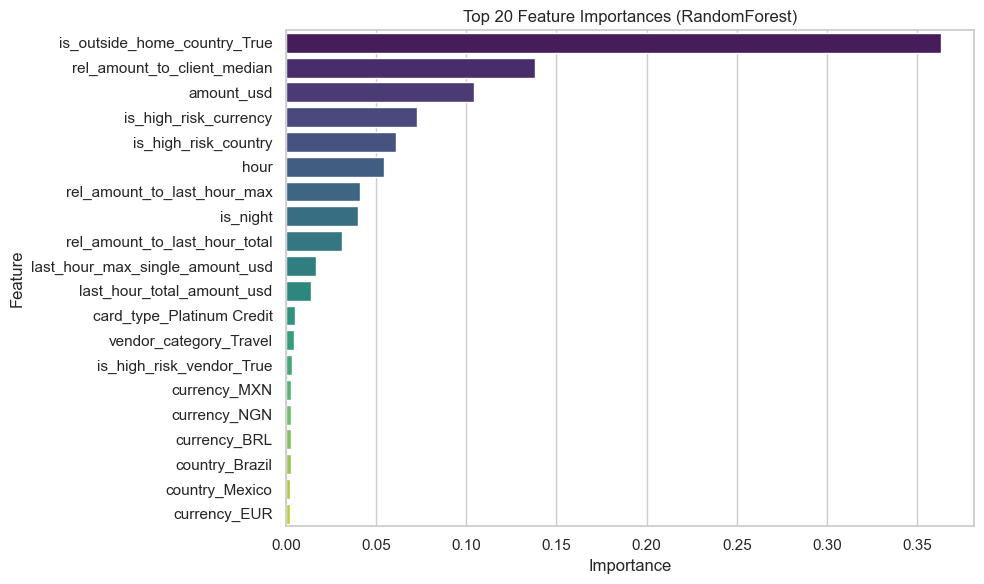

,feature,importance
68,is_outside_home_country_True,0.363215
5,rel_amount_to_client_median,0.138317
0,amount_usd,0.104553
12,is_high_risk_currency,0.072917
13,is_high_risk_country,0.060869
8,hour,0.054334
6,rel_amount_to_last_hour_max,0.041215
11,is_night,0.040065
7,rel_amount_to_last_hour_total,0.030918
2,last_hour_max_single_amount_usd,0.016539


In [ ]:
# Получаем имена признаков после препроцессинга
ohe = rf_fast.named_steps["preprocessor"].named_transformers_["cat"]
ohe_feature_names = ohe.get_feature_names_out(categorical_features)

all_feature_names = (
    numeric_features
    + num_cat_features
    + list(ohe_feature_names)
)

# Получаем важности
importances = rf_fast.named_steps["model"].feature_importances_

feat_imp = pd.DataFrame({
    "feature": all_feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

# Визуализация топ-20 признаков
plt.figure(figsize=(10, 6))
sns.barplot(
    x="importance",
    y="feature",
    data=feat_imp.head(20),
    palette="viridis"
)
plt.title("Top 20 Feature Importances (RandomForest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

feat_imp.head(20)